In [1]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive
from sklearn.datasets import load_breast_cancer 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, ShuffleSplit, GridSearchCV, RandomizedSearchCV, train_test_split, learning_curve, ShuffleSplit

In [2]:
dataset = load_breast_cancer() 


In [3]:
(X_train, X_test, y_train, y_test) = train_test_split(dataset.data, dataset.target, random_state=3, test_size=0.25)

In [4]:
# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# random_hill_climb

In [ ]:
# Initialize neural network object and fit object - attempt 1
nn_model_r0 = mlrose_hiive.NeuralNetwork(hidden_nodes = [40, 30, 10], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, restarts = 0, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 3,)

nn_model_r0.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred_r0 = nn_model_r0.predict(X_train_scaled)

y_train_accuracy_r0 = accuracy_score(y_train, y_train_pred_r0)

print(y_train_accuracy_r0)

In [ ]:
# Predict labels for test set and assess accuracy
y_test_pred_r0 = nn_model_r0.predict(X_test_scaled)

y_test_accuracy_r0 = accuracy_score(y_test, y_test_pred_r0)

print(y_test_accuracy_r0)

In [ ]:
nn_model_r5 = mlrose_hiive.NeuralNetwork(hidden_nodes = [40, 30, 10], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, restarts = 5, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 3)
nn_model_r5.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred_r5 = nn_model_r5.predict(X_train_scaled)

y_train_accuracy_r5 = accuracy_score(y_train, y_train_pred_r5)

print(y_train_accuracy_r5)

In [ ]:
# Predict labels for test set and assess accuracy
y_test_pred_r5 = nn_model_r5.predict(X_test_scaled)

y_test_accuracy_r5 = accuracy_score(y_test, y_test_pred_r5)

print(y_test_accuracy_r5)

In [ ]:
nn_model_r10 = mlrose_hiive.NeuralNetwork(hidden_nodes = [40, 30, 10], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, restarts = 10, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 3)
nn_model_r10.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred_r10 = nn_model_r10.predict(X_train_scaled)

y_train_accuracy_r10 = accuracy_score(y_train, y_train_pred_r10)

print(y_train_accuracy_r10)

In [ ]:
# Predict labels for test set and assess accuracy
y_test_pred_r10 = nn_model_r10.predict(X_test_scaled)
y_test_accuracy_r10 = accuracy_score(y_test, y_test_pred_r10)

print(y_test_accuracy_r10)

In [ ]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(nn_model_r0.fitness_curve))),nn_model_r0.fitness_curve[...,0],'-',label='RHC restarts=0')  # Plot some data on the axes.
ax.plot(range(0,len(list(nn_model_r5.fitness_curve))),nn_model_r5.fitness_curve[...,0],'-',label='RHC restarts=5')  # Plot more data on the axes...
ax.plot(range(0,len(list(nn_model_r10.fitness_curve))),nn_model_r10.fitness_curve[...,0],'-',label='RHC restarts=10') # ... and some more.
#ax.plot(range(0,len(list(nn_model4.fitness_curve))),nn_model4.fitness_curve,'-',label='Gradient Descent')
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Loss')  # Add a y-label to the axes.
ax.set_title("RHC loss curve on different restarts")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [ ]:
cv_method = ShuffleSplit(n_splits=4,test_size=0.2,random_state=6666)
# # Calculate the training and testing scores
# train_scores, test_scores = validation_curve(nn_model1, X_train_scaled, y_train_hot, cv = cv)

# learning curve
train_sizes, train_scores, test_scores = learning_curve(nn_model_r5 , X_train_scaled, y_train,cv=cv_method)

#fit_times_mean = np.mean(fit_times,axis = 1)
#fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning curve for NN using RHC")

# Simulated Annealing

In [ ]:
Schedules = mlrose_hiive.GeomDecay(init_temp=1.0, decay=0.1, min_temp=0.01)
nn_modelSA_decay1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [40, 30, 10], activation ='relu', 
                                 algorithm ='simulated_annealing', schedule = Schedules,
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 1243)

nn_modelSA_decay1.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred_decay1 = nn_modelSA_decay1.predict(X_train_scaled)

y_train_accuracy_decay1 = accuracy_score(y_train, y_train_pred_decay1)

print(y_train_accuracy_decay1)

In [ ]:
# Predict labels for test set and assess accuracy
y_test_pred_decay1 = nn_modelSA_decay1.predict(X_test_scaled)

y_test_accuracy_decay1 = accuracy_score(y_test, y_test_pred_decay1)

print(y_test_accuracy_decay1)

In [ ]:
Schedules = mlrose_hiive.GeomDecay(init_temp=1.0, decay=0.5, min_temp=0.01)
nn_modelSA_decay5 = mlrose_hiive.NeuralNetwork(hidden_nodes = [40, 30, 10], activation ='relu', 
                                 algorithm ='simulated_annealing', schedule = Schedules,
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 13324)

nn_modelSA_decay5.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred_decay5 = nn_modelSA_decay5.predict(X_train_scaled)

y_train_accuracy_decay5 = accuracy_score(y_train, y_train_pred_decay5)

print(y_train_accuracy_decay5)

In [ ]:
# Predict labels for test set and assess accuracy
y_test_pred_decay5 = nn_modelSA_decay5.predict(X_test_scaled)

y_test_accuracy_decay5 = accuracy_score(y_test, y_test_pred_decay5)

print(y_test_accuracy_decay5)

In [ ]:
Schedules = mlrose_hiive.GeomDecay(init_temp=1.0, decay=0.95, min_temp=0.01)
nn_modelSA_decay95 = mlrose_hiive.NeuralNetwork(hidden_nodes = [40, 30, 10], activation ='relu', 
                                 algorithm ='simulated_annealing', schedule = Schedules,
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 1234)

nn_modelSA_decay95.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred_decay95 = nn_modelSA_decay95.predict(X_train_scaled)

y_train_accuracy_decay95 = accuracy_score(y_train, y_train_pred_decay95)

print(y_train_accuracy_decay95)

In [ ]:
# Predict labels for test set and assess accuracy
y_test_pred_decay95 = nn_modelSA_decay95.predict(X_test_scaled)

y_test_accuracy_decay95 = accuracy_score(y_test, y_test_pred_decay95)

print(y_test_accuracy_decay95)

In [ ]:
fig, ax = plt.subplots()  # Create a figure and an axes.
#ax.plot(range(0,len(list(nn_model1.fitness_curve))),nn_model1.fitness_curve[...,0],'-',label='RHC')  # Plot some data on the axes.
ax.plot(range(0,len(list(nn_modelSA_decay1.fitness_curve))),nn_modelSA_decay1.fitness_curve[...,0],'-',label='SA decay = 0.1')  # Plot more data on the axes...
ax.plot(range(0,len(list(nn_modelSA_decay5.fitness_curve))),nn_modelSA_decay5.fitness_curve[...,0],'-',label='SA decay = 0.5') # ... and some more.
ax.plot(range(0,len(list(nn_modelSA_decay95.fitness_curve))),nn_modelSA_decay95.fitness_curve[...,0],'-',label='SA decay = 0.95')
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Loss')  # Add a y-label to the axes.
ax.set_title("SA loss curve with different decay")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [ ]:
Schedules = mlrose_hiive.GeomDecay(init_temp=1, decay=0.95, min_temp=0.001)
nn_modelSA_temp10 = mlrose_hiive.NeuralNetwork(hidden_nodes = [40, 30, 10], activation ='relu', 
                                 algorithm ='simulated_annealing', schedule = Schedules,
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 220)

nn_modelSA_temp10.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred_temp10 = nn_modelSA_temp10.predict(X_train_scaled)

y_train_accuracy_temp10 = accuracy_score(y_train, y_train_pred_temp10)

print(y_train_accuracy_temp10)

In [39]:
# Predict labels for test set and assess accuracy
y_test_pred_temp10 = nn_modelSA_temp10.predict(X_test_scaled)

y_test_accuracy_temp10 = accuracy_score(y_test, y_test_pred_temp10)

print(y_test_accuracy_temp10)


0.8601398601398601


In [40]:
Schedules = mlrose_hiive.GeomDecay(init_temp=0.5, decay=0.95, min_temp=0.001)
nn_modelSA_temp5 = mlrose_hiive.NeuralNetwork(hidden_nodes = [40, 30, 10], activation ='relu', 
                                 algorithm ='simulated_annealing', schedule = Schedules,
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 221)

nn_modelSA_temp5.fit(X_train_scaled, y_train)

NeuralNetwork(algorithm='simulated_annealing', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[40, 30, 10], max_attempts=100,
              max_iters=3000, random_state=221,
              schedule=GeomDecay(init_temp=0.5, decay=0.95, min_temp=0.001))

In [62]:
y_train_pred_temp5 = nn_modelSA_temp5.predict(X_train_scaled)

y_train_accuracy_temp5 = accuracy_score(y_train, y_train_pred_temp5)

print(y_train_accuracy_temp5)
# Predict labels for test set and assess accuracy
y_test_pred_temp5 = nn_modelSA_temp5.predict(X_test_scaled)

y_test_accuracy_temp5 = accuracy_score(y_test, y_test_pred_temp5)

print(y_test_accuracy_temp5)

0.9389671361502347
0.958041958041958


0.958041958041958


In [44]:
Schedules = mlrose_hiive.GeomDecay(init_temp=2, decay=0.5, min_temp=0.001)
nn_modelSA_temp20 = mlrose_hiive.NeuralNetwork(hidden_nodes = [40, 30, 10], activation ='relu', 
                                 algorithm ='simulated_annealing', schedule = Schedules,
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 222)

nn_modelSA_temp20.fit(X_train_scaled, y_train)

NeuralNetwork(algorithm='simulated_annealing', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[40, 30, 10], max_attempts=100,
              max_iters=3000, random_state=222,
              schedule=GeomDecay(init_temp=2, decay=0.5, min_temp=0.001))

In [61]:
y_train_pred_temp20 = nn_modelSA_temp20.predict(X_train_scaled)

y_train_accuracy_temp20 = accuracy_score(y_train, y_train_pred_temp20)

print(y_train_accuracy_temp20)
# Predict labels for test set and assess accuracy
y_test_pred_temp20 = nn_modelSA_temp20.predict(X_test_scaled)

y_test_accuracy_temp20 = accuracy_score(y_test, y_test_pred_temp20)

print(y_test_accuracy_temp20)

0.4084507042253521
0.40559440559440557


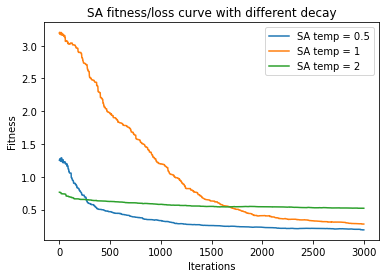

In [48]:
fig, ax = plt.subplots()  # Create a figure and an axes.
#ax.plot(range(0,len(list(nn_model1.fitness_curve))),nn_model1.fitness_curve[...,0],'-',label='RHC')  # Plot some data on the axes.
ax.plot(range(0,len(list(nn_modelSA_temp5.fitness_curve))),nn_modelSA_temp5.fitness_curve[...,0],'-',label='SA temp = 0.5')  # Plot more data on the axes...
ax.plot(range(0,len(list(nn_modelSA_temp10.fitness_curve))),nn_modelSA_temp10.fitness_curve[...,0],'-',label='SA temp = 1') # ... and some more.
ax.plot(range(0,len(list(nn_modelSA_temp20.fitness_curve))),nn_modelSA_temp20.fitness_curve[...,0],'-',label='SA temp = 2')
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("SA fitness/loss curve with different decay")  # Add a title to the axes.
ax.legend()  # Add a legend.

Text(0.5, 1.0, 'NN Learning Curve using SA')

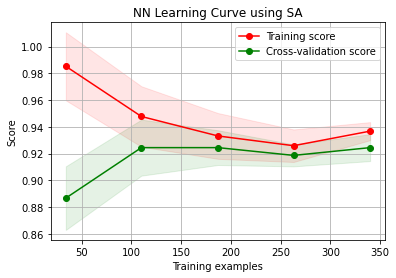

In [51]:
cv_method = ShuffleSplit(n_splits=4,test_size=0.2,random_state=6666)

# learning curve
train_sizes, train_scores, test_scores = learning_curve(nn_modelSA_temp5 , X_train_scaled, y_train, cv = cv_method)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("NN Learning Curve using SA")

# Genetic

In [54]:
nn_modelGA_100 = mlrose_hiive.NeuralNetwork(hidden_nodes = [40, 30, 10], activation ='relu', 
                                 algorithm ='genetic_alg', pop_size = 100,
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 5)

nn_modelGA_100.fit(X_train_scaled, y_train)

NeuralNetwork(algorithm='genetic_alg', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[40, 30, 10], max_attempts=100,
              max_iters=3000, pop_size=100, random_state=5)

In [55]:
y_train_pred = nn_modelGA_100.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train, y_train_pred)

print(y_train_accuracy)
# Predict labels for test set and assess accuracy
y_test_pred = nn_modelGA_100.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test, y_test_pred)

print(y_test_accuracy)

0.9530516431924883
0.9300699300699301


In [56]:
nn_modelGA_200 = mlrose_hiive.NeuralNetwork(hidden_nodes = [40, 30, 10], activation ='relu', 
                                 algorithm ='genetic_alg', pop_size = 200,
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 5)

nn_modelGA_200.fit(X_train_scaled, y_train)

NeuralNetwork(algorithm='genetic_alg', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[40, 30, 10], max_attempts=100,
              max_iters=3000, random_state=5)

In [58]:
y_train_pred = nn_modelGA_200.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train, y_train_pred)

print(y_train_accuracy)
# Predict labels for test set and assess accuracy
y_test_pred = nn_modelGA_200.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test, y_test_pred)

print(y_test_accuracy)

0.744131455399061
0.8251748251748252


In [59]:
nn_modelGA_300 = mlrose_hiive.NeuralNetwork(hidden_nodes = [40, 30, 10], activation ='relu', 
                                 algorithm ='genetic_alg', pop_size = 300,
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 5)

nn_modelGA_300.fit(X_train_scaled, y_train)

NeuralNetwork(algorithm='genetic_alg', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[40, 30, 10], max_attempts=100,
              max_iters=3000, pop_size=300, random_state=5)

In [60]:
y_train_pred = nn_modelGA_300.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train, y_train_pred)

print(y_train_accuracy)
# Predict labels for test set and assess accuracy
y_test_pred = nn_modelGA_300.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test, y_test_pred)

print(y_test_accuracy)

0.5563380281690141
0.5944055944055944


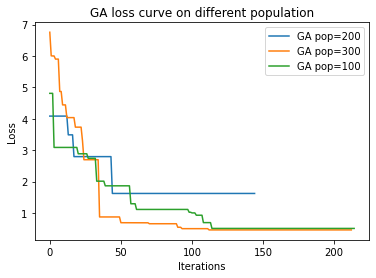

In [66]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(nn_modelGA_100.fitness_curve))),nn_modelGA_100.fitness_curve[...,0],'-',label='GA pop=200')  # Plot some data on the axes.
ax.plot(range(0,len(list(nn_modelGA_200.fitness_curve))),nn_modelGA_200.fitness_curve[...,0],'-',label='GA pop=300')  # Plot more data on the axes...
ax.plot(range(0,len(list(nn_modelGA_300.fitness_curve))),nn_modelGA_300.fitness_curve[...,0],'-',label='GA pop=100') # ... and some more.
#ax.plot(range(0,len(list(nn_model3p100f.fitness_curve))),nn_model3p100f.fitness_curve[...,0],'-',label='Gradient Descent')
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Loss')  # Add a y-label to the axes.
ax.set_title("GA loss curve on different population")  # Add a title to the axes.
ax.legend()  # Add a legend.

Text(0.5, 1.0, 'NN Learning Curve using GA')

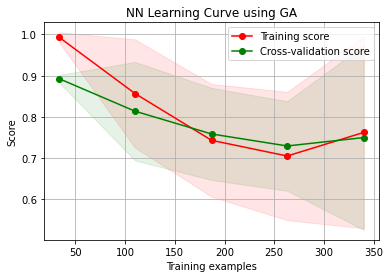

In [67]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=6666)
# # Calculate the training and testing scores

# learning curve
train_sizes, train_scores, test_scores = learning_curve(nn_modelGA_100 , X_train_scaled, y_train, cv = cv_method)

#fit_times_mean = np.mean(fit_times,axis = 1)
#fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("NN Learning Curve using GA")

# Gradient Descent

In [69]:
nn_modelGD = mlrose_hiive.NeuralNetwork(hidden_nodes = [15], activation ='relu', 
                                 algorithm ='gradient_descent', 
                                 max_iters = 3000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, curve=True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_modelGD.fit(X_train_scaled, y_train)

NeuralNetwork(algorithm='gradient_descent', clip_max=5, curve=True,
              early_stopping=True, hidden_nodes=[15], learning_rate=0.0001,
              max_attempts=100, max_iters=3000, random_state=3)

In [71]:
y_train_pred = nn_modelGD.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train, y_train_pred)

print(y_train_accuracy)
# Predict labels for test set and assess accuracy
y_test_pred = nn_modelGD.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test, y_test_pred)

print(y_test_accuracy)

0.9835680751173709
0.972027972027972


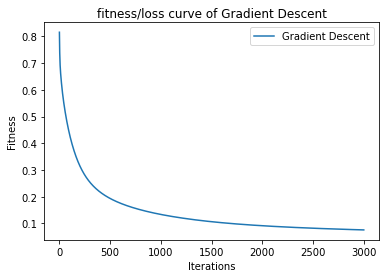

In [73]:
fig, ax = plt.subplots()  # Create a figure and an axes.
#ax.plot(range(0,len(list(nn_model1.fitness_curve))),nn_model1.fitness_curve[...,0],'-',label='RHC')  # Plot some data on the axes.
#ax.plot(range(0,len(list(nn_model2.fitness_curve))),nn_model2.fitness_curve[...,0],'-',label='SA')  # Plot more data on the axes...
#ax.plot(range(0,len(list(nn_model3.fitness_curve))),nn_model3.fitness_curve[...,0],'-',label='GA') # ... and some more.
ax.plot(range(0,len(list(nn_modelGD.fitness_curve))),-nn_modelGD.fitness_curve,'-',label='Gradient Descent')
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("fitness/loss curve of Gradient Descent")  # Add a title to the axes.
ax.legend()  # Add a legend.

Text(0.5, 1.0, 'NN learning curve using Gradient Descent')

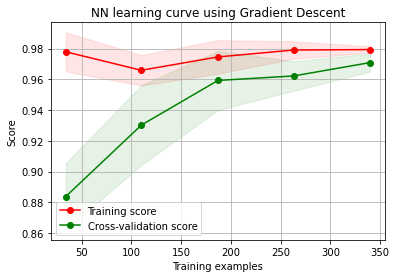

In [84]:
cv_method = ShuffleSplit(n_splits=4,test_size=0.2,random_state=6666)
# # Calculate the training and testing scores
# train_scores, test_scores = validation_curve(nn_model1, X_train_scaled, y_train_hot, cv = cv)

# learning curve
train_sizes, train_scores, test_scores = learning_curve(nn_modelGD , X_train_scaled, y_train,cv=cv_method)

#fit_times_mean = np.mean(fit_times,axis = 1)
#fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("NN learning curve using Gradient Descent")

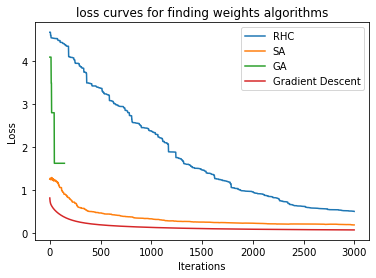

In [85]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(nn_model_r5.fitness_curve))),nn_model_r5.fitness_curve[...,0],'-',label='RHC')  # Plot some data on the axes.
ax.plot(range(0,len(list(nn_modelSA_temp5.fitness_curve))),nn_modelSA_temp5.fitness_curve[...,0],'-',label='SA')  # Plot more data on the axes...
ax.plot(range(0,len(list(nn_modelGA_100.fitness_curve))),nn_modelGA_100.fitness_curve[...,0],'-',label='GA') # ... and some more.
ax.plot(range(0,len(list(nn_modelGD.fitness_curve))),-nn_modelGD.fitness_curve,'-',label='Gradient Descent')
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Loss')  # Add a y-label to the axes.
ax.set_title("loss curves for finding weights algorithms")  # Add a title to the axes.
ax.legend()  # Add a legend.

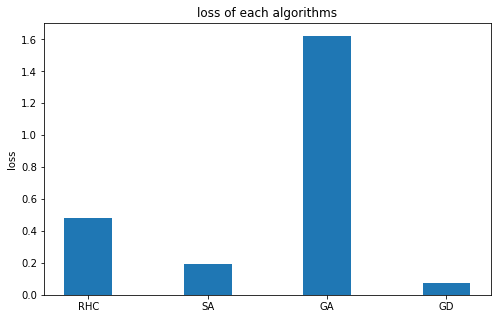

In [77]:
fig = plt.figure(figsize = (8, 5))
names = ["RHC","SA","GA","GD"]
loss_list=[nn_model_r5.loss,nn_modelSA_temp5.loss,nn_modelGA_100.loss,nn_modelGD.loss]
# creating the bar plot
plt.bar(names,loss_list, width = 0.4)
plt.ylabel("loss")
plt.title("loss of each algorithms")
plt.show()

In [78]:
y_test_predRHC = nn_model_r5.predict(X_test_scaled)

y_test_accuracyRHC = accuracy_score(y_test, y_test_predRHC)

print(y_test_accuracyRHC)

0.7552447552447552


In [79]:
y_test_predSA = nn_modelSA_temp5.predict(X_test_scaled)

y_test_accuracySA = accuracy_score(y_test, y_test_predSA)

print(y_test_accuracySA)

0.958041958041958


In [80]:
y_test_predGA = nn_modelGA_100.predict(X_test_scaled)

y_test_accuracyGA = accuracy_score(y_test, y_test_predGA)

print(y_test_accuracyGA)

0.9300699300699301


In [81]:
y_test_predGD = nn_modelGD.predict(X_test_scaled)

y_test_accuracyGD = accuracy_score(y_test, y_test_predGD)

print(y_test_accuracyGD)

0.972027972027972


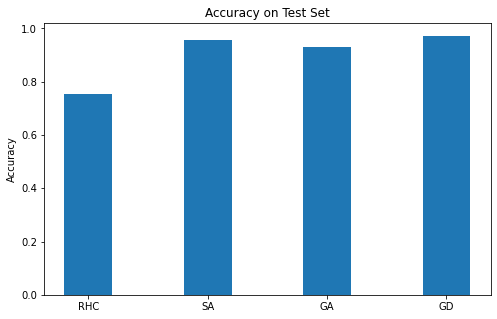

In [82]:
fig = plt.figure(figsize = (8, 5))
names = ["RHC","SA","GA","GD"]
accuracy_list=[y_test_accuracyRHC,y_test_accuracySA, y_test_accuracyGA, y_test_accuracyGD]
# creating the bar plot
plt.bar(names,accuracy_list, width = 0.4)
plt.ylabel("Accuracy")
plt.title("Accuracy on Test Set")
plt.show()